<a href="https://colab.research.google.com/github/NandiniChaturvedi2004/MovieRecommender/blob/main/SMS_Spam_Classifier_PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd

THIS IS A CLASSIFICATION PROJECT -> PREDICTIVE ANALYSIS


In [19]:
df=pd.read_csv('spam.csv' , encoding='latin-1')
#file not encoded in UTF-8 for python strings that is why encoding is used

In [20]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4064,ham,Dont kick coco when he's down,NaN,NaN,NaN
3173,ham,It vl bcum more difficult..,NaN,NaN,NaN
4116,ham,Sure thing big man. i have hockey elections at...,NaN,NaN,NaN
5374,ham,Do u konw waht is rael FRIENDSHIP Im gving yuo...,NaN,NaN,NaN
170,ham,"Sir, I need AXIS BANK account no and bank addr...",NaN,NaN,NaN


In [21]:
df.shape

(5572, 5)

In [5]:
#STEPS TO BE FOLLOWED
#Data Cleaning
#EDA
#Text Processing
#Model Building
#Evaluation
#Improvement
#Website

## 1) DATA CLEANING

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
#Very few values are missing in the last three columns. Thus , we can drop the three columns.
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace=True)

In [24]:
df.sample(5)

,v1,v2
3719,ham,"Yeah why not, is the gang all ready"
3589,ham,I am in escape theatre now. . Going to watch K...
1766,spam,SMS AUCTION You have won a Nokia 7250i. This i...
2036,ham,You can jot down things you want to remember l...
2035,ham,Simply sitting and watching match in office..


In [25]:
#v1 and v2 are not very descriptive , so we will rename the 2 columns using a dictionary
df.rename(columns={'v1': 'target' , 'v2': 'text'},inplace=True)
df.sample(5)

,target,text
485,ham,If we win its really no 1 side for long time.
5323,ham,Aah bless! How's your arm?
1329,ham,I dont know what to do to come out of this so ...
5259,ham,Can help u swoop by picking u up from wherever...
5120,spam,PRIVATE! Your 2003 Account Statement for 078


In [26]:
# next we will use a label encoder to transform the 'target' column(which is currently ham or spam)
# using the encoder 'ham' is assigned the number 0 and 'spam' is assigned the number 1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [27]:
df['target']= encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
# Checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
#checking for duplicate values
df.duplicated().sum()

403

In [30]:
#Dropping the duplicate values and saving it in df
df= df.drop_duplicates(keep='first')

In [31]:
df.duplicated().sum()

0

In [32]:
df.shape

(5169, 2)

##2) EDA


In [33]:
df['target'].value_counts()
#Finding out the number of spam and not spam messages

0    4516
1     653
Name: target, dtype: int64

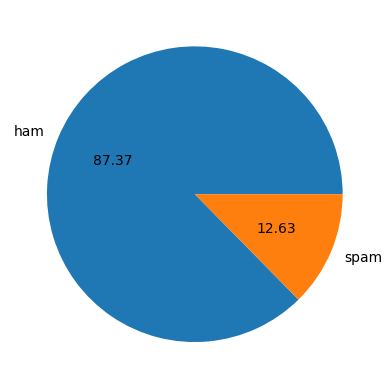

In [35]:
#Representing the above data using a pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels=['ham' , 'spam'],autopct="%0.2f")
plt.show()

##We can conclude from the above chart that the data is imbalanced


In [36]:
!pip install nltk

In [37]:
import nltk


In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [39]:
df['num_characters']=df['text'].apply(len) # num_characters depicts how many characters are in each text
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [40]:
#num_words depicts the number of words in each sentence or text
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [41]:
#num_sentences depicts the number of sentences (breaks the message sentence wise)
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
#Analyzing the spam and ham messages individually
#ham
df[df['target']==0][['num_characters' , 'num_words' , 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
#spam
df[df['target']==1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [44]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

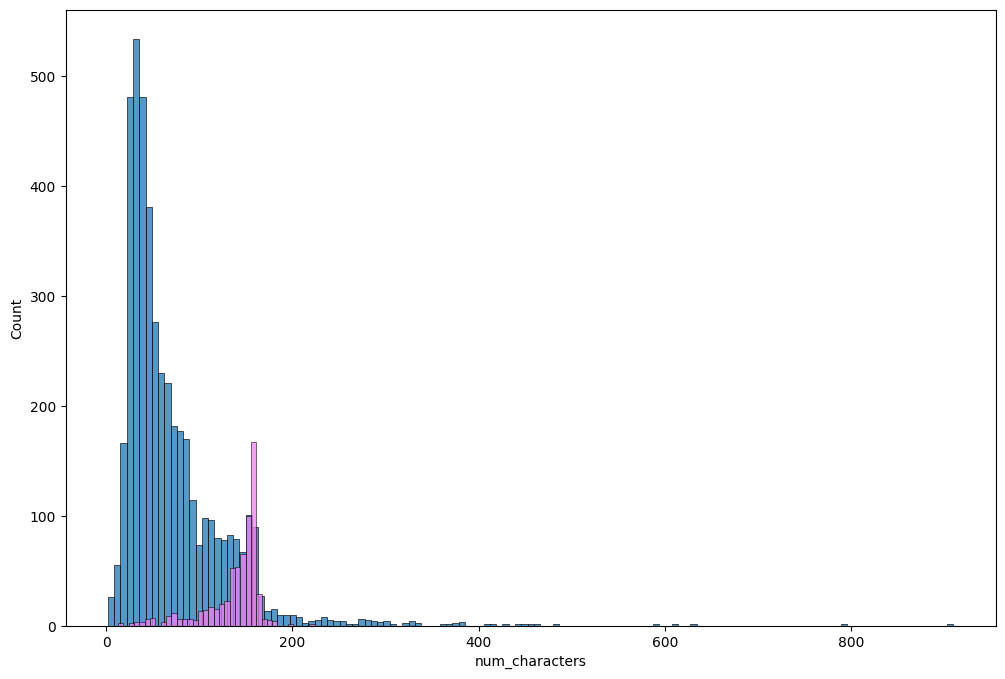

In [45]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'] , color='violet')

<Axes: xlabel='num_words', ylabel='Count'>

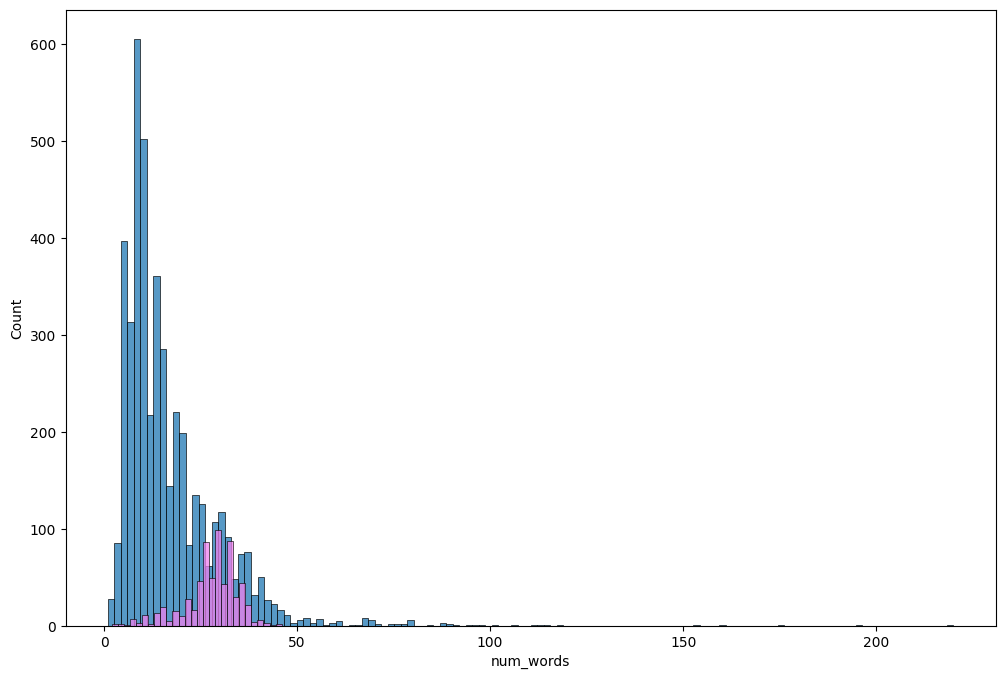

In [46]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'] , color='violet')

##From the above plot, we can conclude that the spam messages(violet) have higher number of characters/words than non-spam messages(blue)

<ipython-input-47-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

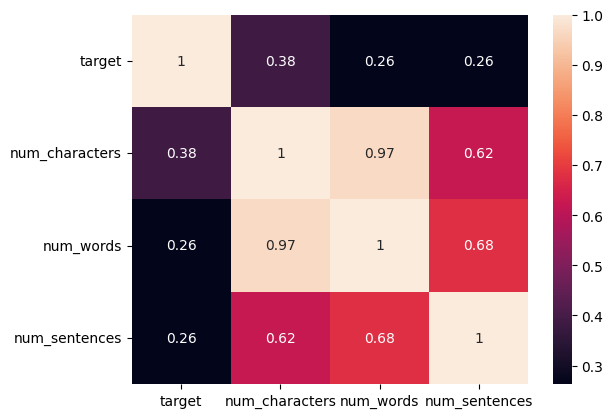

In [47]:
sns.heatmap(df.corr(),annot=True)

From the above heatmap we can conclude that there is a very strong correlation between the 'num_characters','num_words','num_sentences'.Therefore, for the model building we would take 'num_characters' column into consideration as it has the highest correlation of 0.38 with the 'target' column

##3) DATA PREPROCESSING


*   Lowercase
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuations
*   Stemming










In [48]:
!pip install nltk




In [49]:

import nltk
from nltk.corpus import stopwords



In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()


In [52]:
def transform_text(text):
  text=text.lower()  #Lower case
  text=nltk.word_tokenize(text) #Tokenization or breaking down the sentences into words and here the text has been converted into a list


  y=[]
  for i in text:
      if i.isalnum():
        y.append(i)

  text=y[:] #cloning the y list in text and emptying the y
  y.clear()

  for i in text:   #removing the stopwords and punctuation marks
    if i not in stopwords.words('english') and i not in string.punctuation:
       y.append(i)

  text = y[:]
  y.clear()

  for i in text:  #stemming the sentences
     y.append(ps.stem(i))

  return " ".join(y) #returning as string

In [53]:
import nltk
nltk.download('stopwords')
df['transformed_text'] = df['text'].apply(transform_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##Finding out the most common words in 'spam' and 'not-spam/ham' text messages

In [55]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [56]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

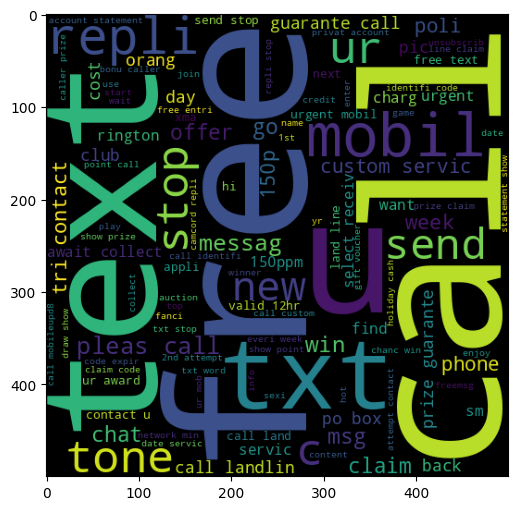

In [57]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

##SPAM MESSAGES (above)


In [58]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

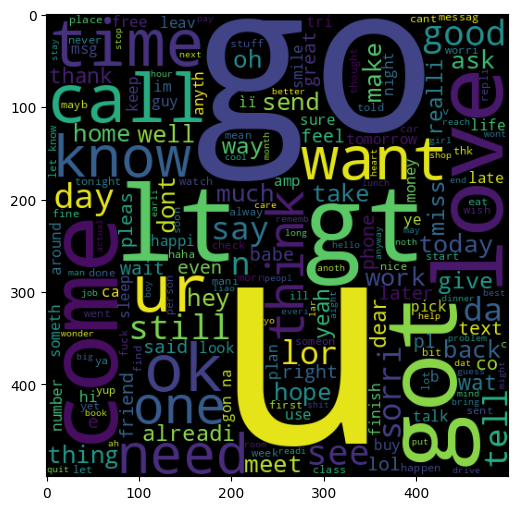

In [59]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

##HAM MESSAGES (above)

In [ ]:
#Finding top 30 words in spam and ham messages

In [60]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
      spam_corpus.append(word)

In [61]:
len(spam_corpus)

9939

In [62]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [63]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
      ham_corpus.append(word)

In [64]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


from matplotlib import pyplot as plt
_df_0[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

## 4) MODEL BUILDING

## Naive Bayes gives one of the best accuracy for textual data

In [65]:
# For applying naive bayes we will have to convert the transformed text data to numeric form using the concept of vectorization

In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [67]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [68]:
X.shape

(5169, 3000)

In [69]:
y = df['target'].values

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [72]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [73]:
#types of naive bayes algo
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [74]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [75]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [76]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


##Since the data is imbalanced , we would focus more on the precision score rather than accuracy
##Therefore we will proceed with 'mnb'

##Now we will compare the accuracy and precision score  of different classification models.

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [79]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [81]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [83]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [84]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [89]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [90]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


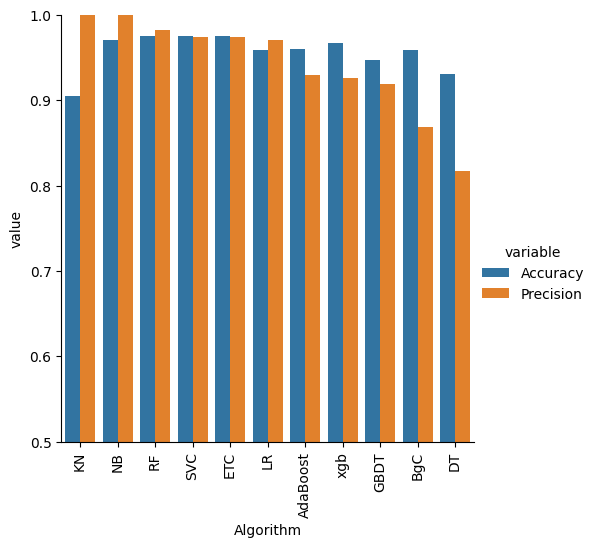

In [88]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improvement


1) We can improve the NAIVE BAYES model by assigning the max features to 3000 in the vectorization process. This improves the accuracy of the model from 95 % to 97 % while retaining the 100% precision

2) We  also used  voting classifier and stacking but both of them either increases the accuracy and decreases the precision or decreases  both the accuracy and precision of the models.

Since precision is a more important factor than accuracy in this case, we will not compromise with the precision.

## Therefore NAIVE BAYES Model gives

*  ACCURACY: 97.1%
*  PRECISION : 100%







